
###**Dog Breed Classification : Tuning and Optimization Implementation**
<br>



####**Neural Network Model Used:**

```
Convolutional Neural Network

```



> **Raw images** - indicated the input image that is use to processed to make it resize and grey scale.

> **Processed images** - are the images that are process from raw images.







***Note:*** Prior to running the program below, make sure that:
1. You have already trained a CNN-based prediction model either using GridSearch or Random based 
technique. 
2. The trained model is already saved in a hdf5 file format or any other format you want to use 
3. Replace the CNN architecture defined in the code with the architecture you used for training your 
prediction model. 
4. Replace the prediction file (Richie_Project.hdf5) defined in the code with the prediction file you 
generated in your own training experiment. 
5. Make sure to modify the sample interface provided with your own interface design. 
6. Save the file in a separate notebook named testing.ipynb 
> (The codes and interface design are properties of MORALES, JOHN RICHIE and DE LUNA, ACHILLES 
REGINALD as part of the final project they submitted in ITC73. They are being provided as templates for 
educational purposes. You are not allowed to submit the same set of codes and interface design without 
providing your own modifications on these codes and designs. Doing so will be tantamount to plagiarism)

**Step 1:** Define you CNN architecture (Architecture must be the same as the one used for training the prediction model.)

In [ ]:
#MODEL

#A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
import keras
from keras.models import Sequential
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import backend as K
from keras.layers import Lambda, Dense
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers.core import Dense,Dropout,Activation,Flatten

from tensorflow.keras.optimizers import SGD,RMSprop,Adam,Adadelta
from keras.utils import np_utils
img_rows, img_cols = 50, 50

nb_filters = 32
nb_pool = 2
nb_conv = 3

batch_Size = 35
nb_classes = 3
nb_epoch = 100


#Its layers are accessible via the layers attribute
model = tf.keras.Sequential()

#You can create a Sequential model by passing a list of layers to the Sequential constructor
#You can also create a Sequential model incrementally via the add() method
model.add(Convolution2D(nb_filters, nb_conv, nb_conv, input_shape=(img_rows, img_cols, 1))) #, activation = 'relu', data_format=('channels_first))
convout1 = Activation('relu')
model.add(convout1)
model.add(Convolution2D(nb_filters, nb_conv, nb_conv))
convout2 = Activation('relu')
model.add(convout2)
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.5))

#Activations can either be used through an Activation layer, or through the activation argument supported by all forward layers
model.add(Flatten()) #flatten function flattens the multi-dimensional input tensors into a single dimension
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5)) #Dropout can be applied to input neurons called the visible layer.
model.add(Dense(nb_classes))
model.add(Activation('softmax'))#Softmax converts a vector of values to a probability distribution.
model.summary() #model summary table reports the strength of the relationship between the model and the dependent variable

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 16, 16, 32)        320       
_________________________________________________________________
activation_4 (Activation)    (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 32)          9248      
_________________________________________________________________
activation_5 (Activation)    (None, 5, 5, 32)          0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 2, 2, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)              

**Step 2:** Load and save prediction model file

In [ ]:
#LOADING MODEL
model.load_weights('DogBreedModel.h5')

**Step 3:** Execute the prediction GUI for prediction (Accept new images and output category prediction.)

C:/Users/Pher/Documents/elective4/Shih Tzu


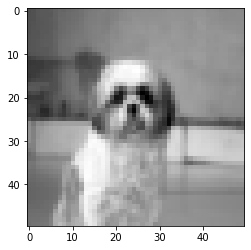

In [ ]:
from PIL import ImageTk, Image #loading Python Imaging Library
import PIL.Image
import tkinter as tk
import tkinter.filedialog
import getpass
import os
import imageio
import numpy as np
import matplotlib
from skimage.transform import resize
from skimage import data
from skimage import color
from skimage import io
from matplotlib import pyplot as plt

root = tk.Tk() #Create a window
user = getpass.getuser() # A simple Python program to demonstrate. Getpass is to read password
root.title("3J Dog Breed Classification") #Set Title as Image Loader
canvas = tk.Canvas(root, width = 700, height = 450, bg = '#FFFFFF') #Allow Window to be resizable
canvas.pack() # packs widgets in rows or columns
Header = tk.Label(root, text='Chihuahua', bg = '#EF3743', fg = 'White', font = 'roman 25')
canvas.create_window(350, 25, window = Header, width = 1500)
Header = tk.Label(root, text='Labrador', bg = '#EF3743', fg = 'White', font = 'roman 25')
canvas.create_window(350, 25, window = Header, width = 1500)
Header = tk.Label(root, text='Shih tzu', bg = '#EF3743', fg = 'White', font = 'roman 15')
canvas.create_window(350, 25, window = Header, width = 1500)

def click():
  # Get the file
    global file
    global fileentry
    global img
    file = tkinter.filedialog.askopenfilename(initialdir='C:/Users/%s' % user)
  # split the filepath to get the directory
    directory = os.path.split(file)[0]
    print(directory)
    fileentry = tk.Label(root, text=file, bg = '#EF3743', fg = 'White', font = 'roman 10')
    canvas.create_window(350, 315, window = fileentry, width = 1500)
    img = Image.open(file) #open method used to open different extension image file
    img = img.resize((350, 150))
    img = ImageTk.PhotoImage(img)

    canvas.create_image(350, 220, image=img)
    root.mainloop()
    plt.show() #This method will show image in any image viewer 
    
def predict():

    img1 = color.rgb2gray(imageio.imread(fileentry.cget("text")))
    img1 = resize(img1, (50,50)).astype(np.float32, casting = 'unsafe')
    plt.imshow(img1, cmap='gray')
    maxidx = model.predict(img1.reshape([-1,50,50,1]))
    max_ind = np.array(maxidx)
    max_val = max_ind[0, maxidx.argmax()]
    i, j = np.unravel_index(maxidx.argmax(), maxidx.shape)

    dog = (np.argmax(maxidx[0]))

    if dog==0:
        strCat = "Chihuahua"
    elif dog==1:
        strCat = "Labrador"
    elif dog==2:
        strCat = "Shih tzu"
    else:
        strCat = "Not in the category"
    richie = strCat
    percent=str(np.round(max_val*100))

    label.configure(text=""+percent+" % "+ richie)

    same=True

    n=2

    root.mainloop()
    plt.show()

choose = tk.Button(root, command= click, bg='#EF3743', fg='white',text='        BROWSE        ',font='arial 12 ')
canvas.create_window(350, 110, window=choose)

#button to call the 'values' command above
prediction = tk.Button(root, command= predict, bg='#EF3743', fg='white', text='  PREDICT IMAGE  ', font = "arial 12 ")
canvas.create_window(350, 345, window=prediction)

label=tk.Label(root, text="                    ", bg = '#EF3743', fg = "white", font = "roman 16 bold ")
canvas.create_window(350,400, window=label)

root.mainloop()